# Frequency Analyses

Pada pendeketan statistik machine learning menggunakan, hal pertama yang harus dilakukan adalah menghitungan jumlah kata - khususnya untuk unigram yang memiliki keterkaitan kata. Untuk itu NLTK menyediakan class untuk melakukannya. Terdapat beberapa fungsi yang tersedia seperti dibawah ini: 

- `FreqDist`
- `ConditionalFreqDist` 

Melalui pondasi dari fungsi ini maka probabilitas dan statistik analisis dapat dilakukan.
Pertama yang akan kita hitung adalah sebagai berikut:
- Menghitung jumlah kata
- Menghitung jumlah kota kata(*vocabulary*)


In [1]:
import nltk
from pprint import pprint
reuters = nltk.corpus.reuters # Corpus of news articles
counts  = nltk.FreqDist(reuters.words())
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print ("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 41600 types and 1720901 tokens for a lexical diversity of 41.368


## Implmetansi NLP

Kita akan menggunakan NLP untuk mengelola sebuah berita online dengan menggunakan beberapa fitur yang tersedia. Seperti:
- Boilerpipe untuk melakukan  pengambilan data menggunakan algoritma [Boilerplate Detection using Shallow Text Features](https://www.l3s.de/~kohlschuetter/publications/wsdm187-kohlschuetter.pdf)

In [2]:
import feedparser
import os
import time
#from urlparse import urlparse
from boilerpipe.extract import Extractor


In [3]:
url="http://www.beritasatu.com/politik/463625-presiden-jokowi-dijadwalkan-buka-kongres-trisakti-gmni-di-manado.html"
extractor = Extractor(extractor='ArticleExtractor', url=url)
content = extractor.getText() 
content=content.lower()
content

'presiden jokowi dijadwalkan buka kongres trisakti gmni di manado\npresiden joko widodo. ( foto: antara )\nnovy lumanauw / cah rabu, 15 november 2017 | 06:56 wib\nmanado - presiden joko widodo (jokowi), hari dijadwalkan membuka kongres trisakti ke-20 gerakan mahasiswa nasional indonesia (gmni) di kompleks gubernuran\u200e manado, sulawesi utara.\nkongres bertema "meneguhkan masa depan indonesia berdasarkan pancasila di era asia pasifik" akan diikuti seluruh koordinator daerah dan cabang gmni dari 34 provinsi.\npresiden jokowi didampingi ibu negara iriana jokowi telah berada di manado. pasangan orang nomor satu di republik ini, tiba di manado, pada rabu (15/11) dini hari setelah menempuh perjalanan dari manila, filipina usai menghadiri ktt asean ke-31.\npesawat kepresidenan indonesia-1, yang membawa presiden jokowi beserta rombongan mendarat di bandara internasional sam ratulangi, pada pukul 00.20 wita.\nkedatangan presiden jokowi dan ibu iriana disambut oleh gubernur sulawesi utara oll

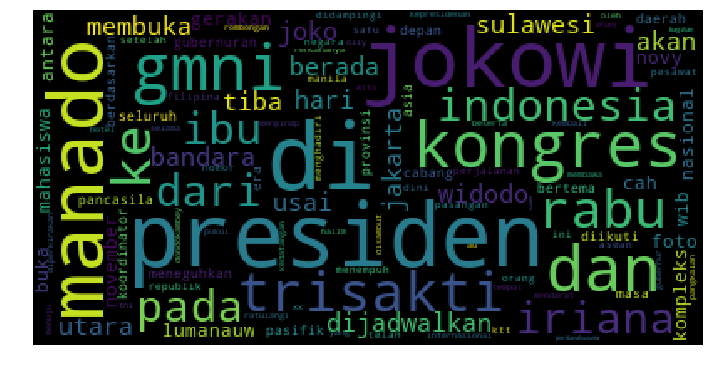

In [4]:
%matplotlib inline
from pprint import pprint
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_words=1200)
cloud.generate_from_text(content)
plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()


Setelah kita mendapatkan informasi yang di inginkan selanjutnya kita melakukan analisa dengan memisahkan kalimat menggunakan fungsi nltk 

In [ ]:
from nltk.tokenize import sent_tokenize
array_kalimat=sent_tokenize(content)
array_kalimat

In [ ]:
from nltk.tokenize import word_tokenize
array_word=word_tokenize(content)
array_word

In [ ]:
f=open("data/StopWordID")
stopword_id=f.read()
indonesia_stopwords  =word_tokenize(stopword_id)
indonesia_stopwords
import string
punctuation=string.punctuation
additional_punctuation=[".","-","``"]
array_punctuation=word_tokenize(punctuation)
stopword=indonesia_stopwords+array_punctuation +additional_punctuation


In [ ]:
filter_kata=[kata for kata in array_word if kata not in stopword]
filter_kata

In [ ]:
import nltk
counts  = nltk.FreqDist(filter_kata)
counts

In [ ]:
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print "Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv)

Bila kita analisa dengan menggunakan tag cloud maka hasil yang di dapatkan adalah sebagai berikut:

In [ ]:
from nltk import ngrams
sentence = 'this is a foo bar sentences and i want to ngramize it'
n = 6
sixgrams = ngrams(sentence.split(), n)
for grams in sixgrams:
  print grams
